<a href="https://colab.research.google.com/github/2024S2-ML/.github/blob/main/site/pt-br/tutorials/keras/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2018 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [ ]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Classificação básica: classificação de imagens de roupas

<table class="tfo-notebook-buttons" align="left">
  <td>     <a target="_blank" href="https://www.tensorflow.org/tutorials/keras/classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png">Ver em TensorFlow.org</a>
</td>
  <td>     <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/pt-br/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png">Executar no Google Colab</a>
</td>
  <td>     <a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/pt-br/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png">Ver fonte no GitHub</a>
</td>
  <td>     <a href="https://storage.googleapis.com/tensorflow_docs/docs-l10n/site/pt-br/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png">Baixar notebook</a>
</td>
</table>

Este guia treina um modelo de rede neural para classificar imagens de roupas, como tênis e camisetas. Não tem problema se você não entender todos os detalhes. Esta é uma visão geral rápida de um programa completo do TensorFlow, e os detalhes são explicados aos poucos.

Este guia usa o [tf.keras](https://www.tensorflow.org/guide/keras), uma API de alto nível, para criar e treinar modelos no TensorFlow.

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.17.0


## Importar o dataset Fashion MNIST

Este guia usa o dataset [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist), que contém 70 mil imagens em escala de cinza, em 10 categorias. As imagens mostram artigos de vestuário individuais com resolução baixa (28x28 pixels), conforme visto aqui:

<table>
  <tr><td>     <img src="https://tensorflow.org/images/fashion-mnist-sprite.png" alt="Fashion MNIST sprite" width="600">   </td></tr>
  <tr><td align="center">     <b>Imagem 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Amostras do Fashion MNIST</a> (por Zalando, Licença MIT).<br>
</td></tr>
</table>

O Fashion MNIST é usado como substituto do dataset [MNIST](http://yann.lecun.com/exdb/mnist/) clássico, geralmente utilizado como o "Olá, mundo" dos programas de aprendizado de máquina para visão computacional. O dataset MNIST contém imagens de dígitos escritos à mão (0, 1, 2, etc.) em um formato idêntico ao dos artigos de vestuário que você usará aqui.

Este tutorial usa o Fashion MNIST por ser variado e por ser um problema um pouco mais desafiador que o MNIST comum. Os dois datasets são relativamente pequenos e são usados para verificar se um algoritmo funciona como esperado. Eles são bons pontos de partida para testar e depurar o código.

Aqui, 60 mil imagens são usadas para treinar a rede, e 10 mil imagens são usadas para avaliar com que exatidão a rede aprendeu a classificar as imagens. Você pode acessar o dataset Fashion MNIST diretamente no TensorFlow. Importe e [carregue os dados do Fashion MNIST](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data) diretamente do TensorFlow:

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Ao carregar o dataset, são retornadas quatro matrizes NumPy:

- As matrizes `train_images` e `train_labels` são o *conjunto de treinamento* — os dados que o modelo usa para aprender.
- O modelo é estado com um *conjunto de teste*, `test_images`, e matrizes `test_labels`.

As imagens são matrizes NumPy 28x28, sendo que os valores de pixel variam de 0 a 255. Os *rótulos* são uma matriz de números inteiros, que variam de 0 a 9. Eles correspondem à *classe* de roupas que a imagem representa:

<table>
  <tr>
    <th>Rótulo</th>
    <th>Classe</th>
  </tr>
  <tr>
    <td>0</td>
    <td>Camiseta/Top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Calça</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Suéter</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Vestido</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Casaco</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandália</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Camisa</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Tênis</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bolsa</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Botim</td>
  </tr>
</table>

Cada imagem é mapeada para um único rótulo. Como os  *nomes das classes* não estão incluídos no dataset, armazene-os aqui par usá-los posteriormente ao plotar as imagens:

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explorar os dados

Vamos explorar o formato do dataset antes de treinar o modelo. O código abaixo mostra que há 60 mil imagens no conjunto de treinamento, com cada imagem representada como pixels 28x28.

In [5]:
train_images.shape

(60000, 28, 28)

Da mesma forma, há 60 mil rótulos no conjunto de treinamento:

In [6]:
len(train_labels)

60000

Cada rótulo é um número inteiro entre 0 e 9:

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Há 10 mil imagens no conjunto de teste. Novamente, cada imagem é representada por pixels de 28x28:

In [8]:
test_images.shape

(10000, 28, 28)

E o conjunto de teste contém 10 mil rótulos de imagens:

In [9]:
len(test_labels)

10000

## Pré-processar os dados

Os dados precisam ser pré-processados antes de treinar a rede. Se você conferir a primeira imagem no conjunto de treinamento, verá que os valores de pixel ficam no intervalo de 0 a 255:

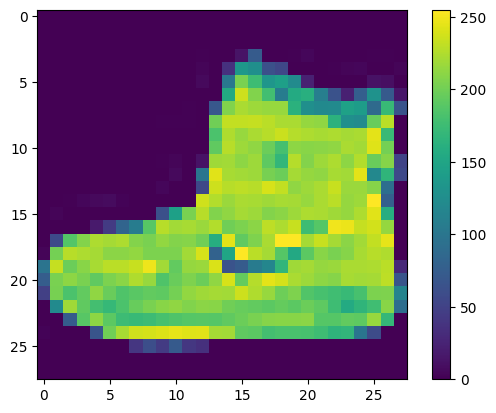

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Mude a escala desses valores para o intervalo de 0 a 1 antes de alimentá-los no modelo da rede neural. Para fazer isso, divida os valores por 255. É importante que o *conjunto de treinamento* e o *conjunto de teste* sejam pré-processados da mesma forma:

In [11]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Para verificar se os dados estão no formato correto e se está tudo pronto para criar e treinar a rede, vamos exibir as 25 primeiras imagens do *conjunto de treinamento* e vamos exibir também o nome da classe abaixo de cada imagem.

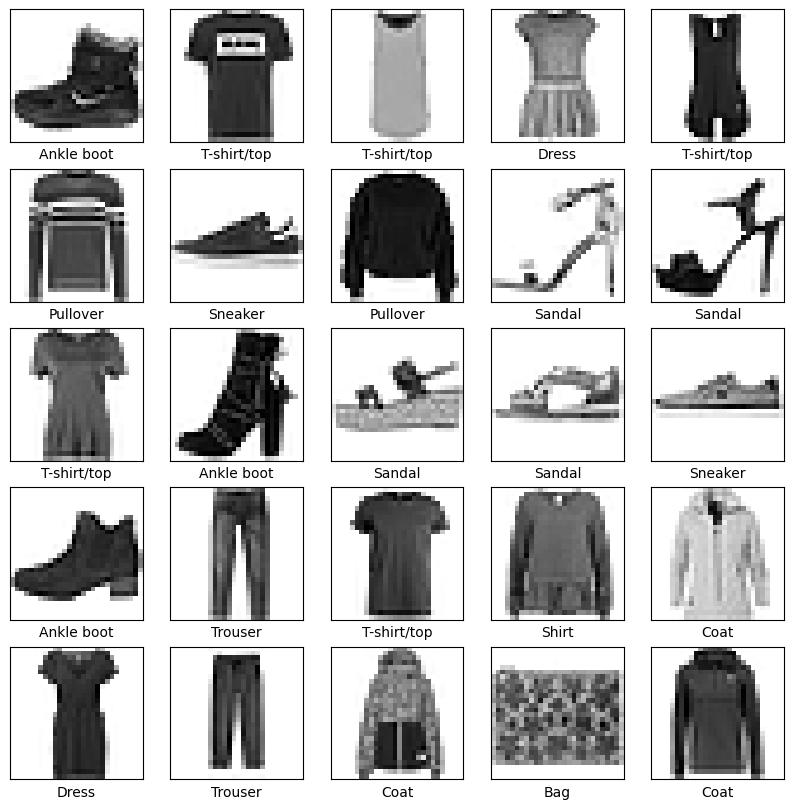

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Criar o modelo

Criar a rede neural requer a configuração das camadas do modelo e depois a compilação do modelo.

### Configurar as camadas

O bloco de construção básico de uma rede neural é a [*camada*](https://www.tensorflow.org/api_docs/python/tf/keras/layers). As camadas extraem representações dos dados alimentados nela. Espera-se que essas representações tenham um significado para o problema em questão.

A maioria dos aprendizados profundos consiste da combinação de camadas simples. A maioria das camadas, como `tf.keras.layers.Dense`, têm parâmetros que são aprendidos durante o treinamento.

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


A primeira camada desta rede, `tf.keras.layers.Flatten`, transforma o formato das imagens de uma matriz bidimensional (de pixels 28x28) em uma matriz unidimensional (de 28 * 28 = 784 pixels). Pense nessa camada como pegar as linhas de pixels da imagem e enfileirá-las. Essa camada não tem parâmetros a aprender, ela somente reformata os dados.

Após os pixels serem achatados, a rede consiste de uma sequência de duas camadas `tf.keras.layers.Dense`, que são camadas neurais densamente conectadas, ou totalmente conectadas. A primeira camada `Dense` tem 128 nós (ou neurônios). A segunda (e última) camada retorna uma matriz de logits, com tamanho igual a 10. Cada nó contém uma pontuação que indica que a imagem atual pertence a uma das 10 classes.

### Compilar o modelo

Antes que o modelo fique pronto para o treinamento, é preciso fazer mais algumas configurações, que são adicionadas durante o passo de [*compilação*](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) do modelo:

- [*Função de perda*](https://www.tensorflow.org/api_docs/python/tf/keras/losses) — Mensura a exatidão do modelo durante o treinamento. Você vai querer minimizar essa função para "guiar" o modelo para a direção certa.
- [*Otimizador*](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) — Indica como o modelo é atualizado com base nos dados que vê e em sua função de perda.
- [*Métricas*](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) — Usadas para monitorar os passos de treinamento e teste. O exemplo abaixo usa  *exatidão*, a fração das imagens que estão classificadas corretamente.

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Treinar o modelo

O treinamento da modelo de rede neural requer os seguintes passos:

1. Alimentar os dados de treinamento no modelo. Neste exemplo, os dados de treinamento estão nas matrizes `train_images` e `train_labels`.
2. O modelo aprende a associar imagens e rótulos.
3. Você pede para o modelo fazer previsões sobre um conjunto de teste. Neste exemplo, é a matriz `test_images`.
4. Verifique se as previsões correspondem aos rótulos da matriz `test_labels`.


### Alimentar o modelo

Para iniciar o treinamento, faça uma chamada ao método [`model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit), chamado de "fit" (adequar) porque ele faz o modelo "se adequar" aos dados de treinamento:

In [15]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7807 - loss: 0.6316
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8594 - loss: 0.3926
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8731 - loss: 0.3523
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8854 - loss: 0.3184
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8896 - loss: 0.2946
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8940 - loss: 0.2820
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8989 - loss: 0.2707
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9033 - loss: 0.2568
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9083 - loss: 0.2499
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9124 - loss: 0.2364


À medida que o modelo é treinado, as métricas de perda e exatidão são exibidas. Este modelo atinge uma exatidão de cerca de 0,91 (91%) para os dados de treinamento.

### Avaliar a exatidão

Agora, compare o desempenho do modelo para o dataset de teste:

In [16]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.8843 - loss: 0.3308

Test accuracy: 0.8842999935150146


Percebe-se que a exatidão para o dataset de teste é um pouco menor do que para o dataset de treinamento. Essa discrepância entre a exatidão do treinamento e a exatidão do teste representa o *overfitting*. O overfitting acontece quando um modelo de aprendizado de máquina tem um desempenho inferior com entradas novas, nunca vistas anteriormente, em comparação aos dados de treinamento. Um modelo com overfitting "memoriza" o ruído e os detalhes do dataset de treinamento a ponto de impactar negativamente o desempenho do modelo para novos dados. Se quiser saber mais, confira:

- [Demonstração do overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting)
- [Estratégias para evitar o overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting)

### Fazer previsões

Com o modelo treinado, você pode usá-lo para fazer previsões sobre algumas imagens. Anexe uma camada softmax para converter as saídas lineares do modelo ([logits](https://developers.google.com/machine-learning/glossary#logits)) em probabilidades, que devem ser mais fáceis de interpretar.

In [17]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [18]:
predictions = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Aqui, o modelo previu o rótulo de cada imagem no conjunto de teste. Vamos conferir a primeira previsão:

In [19]:
predictions[0]

array([5.65188111e-06, 4.27739977e-09, 3.39172850e-08, 9.48466816e-09,
       1.43128602e-08, 1.14550843e-04, 5.78823528e-06, 3.69721577e-02,
       1.09926505e-05, 9.62890685e-01], dtype=float32)

Uma previsão é uma matriz com 10 números. Eles representam a "confiança" do modelo de que a imagem corresponde a cada um dos 10 diferentes artigos de vestuário. Você pode ver qual rótulo tem o maior valor de confiança:

In [20]:
np.argmax(predictions[0])

9

Portanto, o modelo tem maior confiança de que esta imagem é um botim, ou `class_names[9]`. Ao avaliar o rótulo de teste, vemos que essa classificação está correta:

In [21]:
test_labels[0]

9

Gere um gráfico para ver o conjunto completo das 10 previsões de classe:

In [22]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Verificar as previsões

Com o modelo treinado, você pode usá-lo para fazer previsões sobre algumas imagens.

Vamos conferir a imagem, previsão e matriz de previsões na posição 0. Os rótulos com previsão correta são azuis, e os rótulos com previsão incorreta são vermelhos. O número dá a porcentagem (até 100) do rótulo previsto.

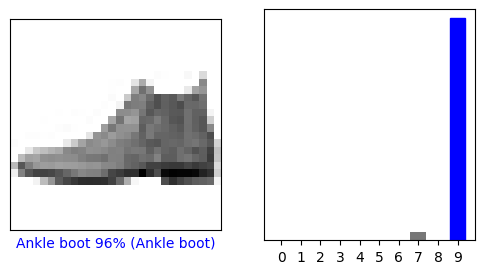

In [23]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

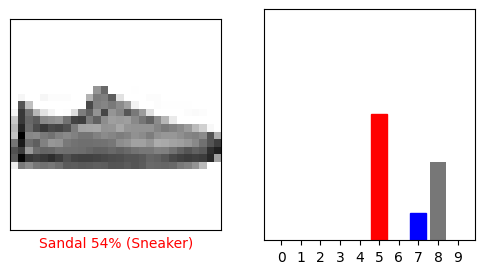

In [24]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Vamos plotar diversas imagens com suas previsões. Observe que o modelo pode errar mesmo quando tiver confiança alta.

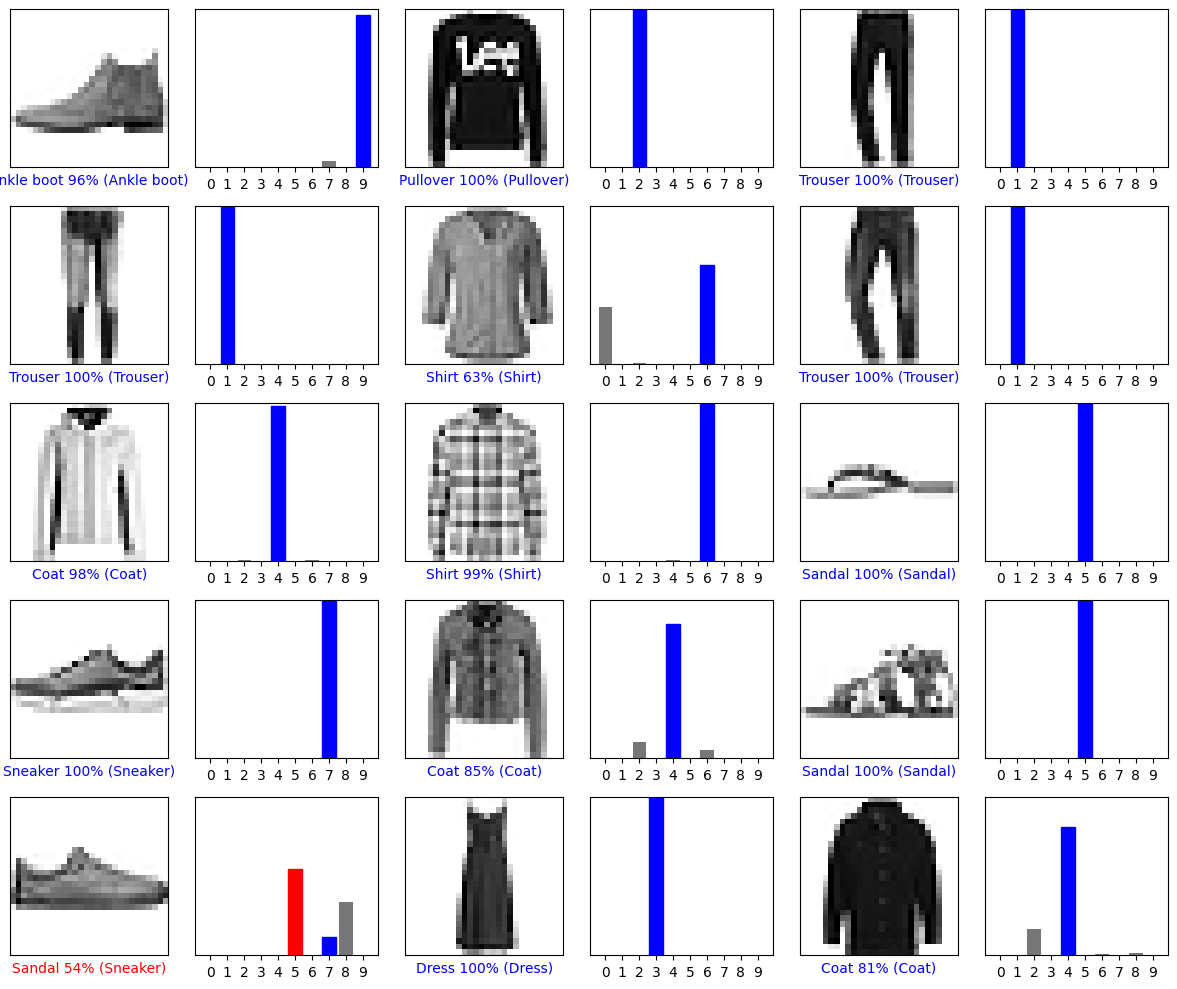

In [25]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Usar o modelo treinado

Por fim, use o modelo treinado para fazer uma previsão sobre uma única imagem.

In [26]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


Os modelos do `tf.keras` são otimizados para fazer previsões para um *lote*, ou coleção, de exemplos ao mesmo tempo. Mesmo que você esteja usando uma única imagem, precisa adicioná-la a uma lista:

In [27]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Agora, faça a previsão do rótulo correto para essa imagem:

In [28]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[6.69505462e-05 3.71430913e-13 9.99541044e-01 1.18192851e-11
  1.04915554e-04 1.33375658e-10 2.87204864e-04 4.28075438e-18
  4.60436585e-11 6.50380807e-18]]


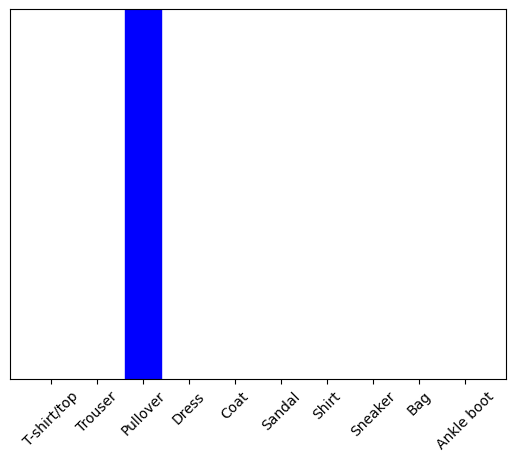

In [29]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

`tf.keras.Model.predict` retorna uma lista de listas: uma lista para cada imagem no lote de dados. Obtenha as previsões para nossa única imagem no lote:

In [30]:
np.argmax(predictions_single[0])

2

E o modelo prevê um rótulo conforme esperado.